In [1]:
# loading data and data wrangling

# do K-means clustering analysis to find the proper value that could be used to filters out local landlords and companies

# do clustering analysis using Gaussian Mixture Model

In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
# loading data and data wrangling
## loading data
df = pd.read_csv('../data/listings.csv', low_memory=False)

In [4]:
## data wrangling
### select the column of 'host_id' to make a new dataframe called df1
df1 = df[['host_id']]
num_rows = len(df1)
print(num_rows)

87947


In [5]:
### creat a new dataframe
# to make a column called ones (I don't like to use groupby().count, as the if i groupby the 'host_id' then the other like 'name' 
# that i select from df will show the count of 'host_id' that could be ambiguous)
### create an array where each element is 1 using np.ones
ones_array = np.ones((num_rows, 1))

### convert the array to a DataFrame
df_ones = pd.DataFrame(ones_array, columns=['ones'])
df1.head(3)
## make every lines' value of 'one' to be int
df1['ones'] = df_ones['ones'].astype(int)
df1.head(19)

/tmp/ipykernel_19545/1492325801.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ones'] = df_ones['ones'].astype(int)


,host_id,ones
0,54730,1
1,60302,1
2,498201,1
3,67564,1
4,499704,1
5,497514,1
6,41759,1
7,502496,1
8,103583,1
9,503548,1


In [6]:
### convert the values in the 'one' column of each row to integers
grouped_df1 = df1.groupby('host_id').sum()
grouped_df1 = grouped_df1.reset_index().rename(columns={'ones': 'counts'})
grouped_df1.head(14)

,host_id,counts
0,4775,6
1,4879,1
2,6774,7
3,9323,1
4,9870,1
5,10657,3
6,10953,1
7,11431,1
8,13690,1
9,14596,3


In [7]:
# do K-means clustering analysis to find the proper value that could be used to filters out local landlords and companies
## do K-means clustering analysis
from sklearn.cluster import KMeans
the_count = grouped_df1[['counts']]  # Use double brackets to maintain DataFrame format


k_pref = 3  # The number of clusters have chosen
kmeans = KMeans(n_clusters=k_pref,  n_init=31, random_state=42)
kmeans.fit(the_count)

# join the cluter to the origin dataframe
grouped_df1['local_or_company'] = kmeans.labels_

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


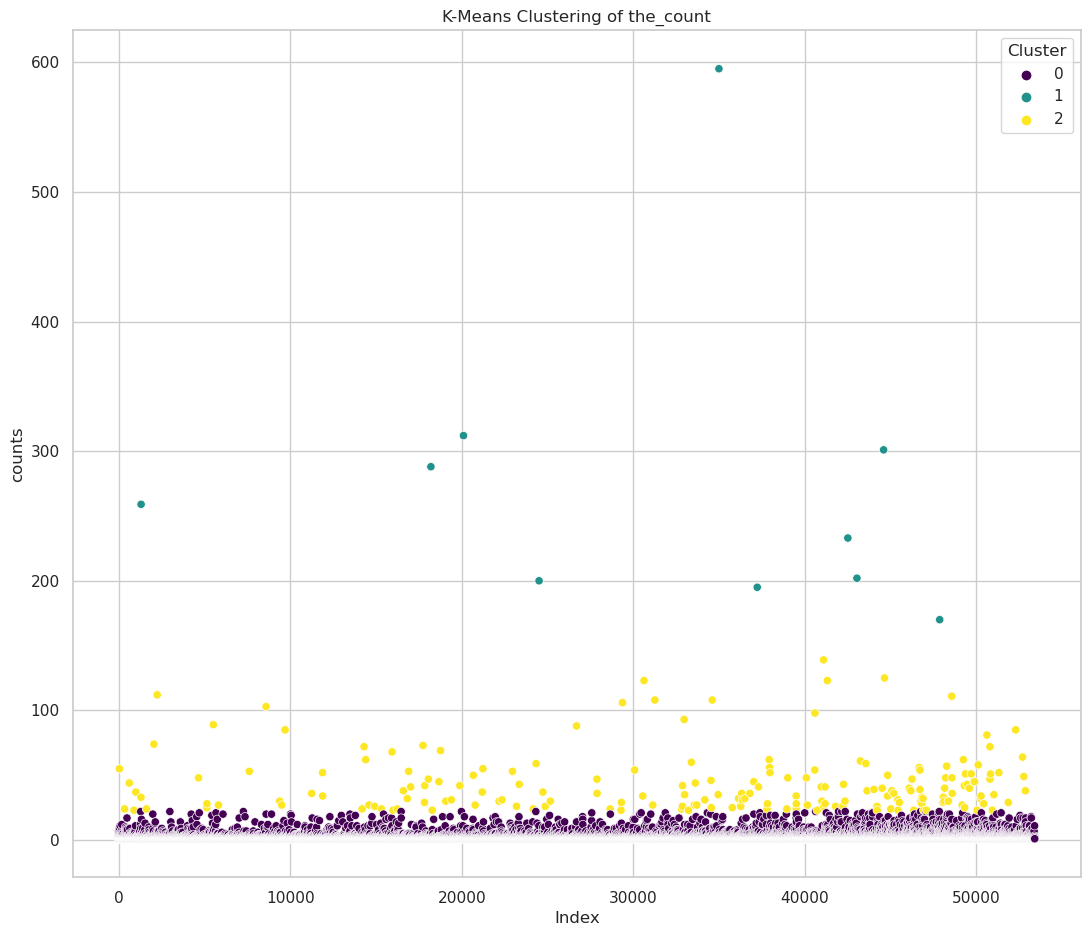

In [8]:
## Plot the result of clustering
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style
sns.set(style="whitegrid")

# Create a scatter plot where the x-axis is the index, the y-axis is the value of 'calculated_host_listings_count', and the color is determined by cluster labels
plt.figure(figsize=(13, 11))
sns.scatterplot(x=grouped_df1.index, y=grouped_df1['counts'], hue=grouped_df1['local_or_company'], palette='viridis')

# Add chart title and labels
plt.title('K-Means Clustering of the_count')
plt.xlabel('Index')
plt.ylabel('counts')

# Generate the chart
plt.legend(title='Cluster')
plt.show()

In [9]:
## Define based on facts
# df is my DataFrame
# Replace values in the 'local_or_company' column that are equal to 0 with 1, and replace other values with 0
grouped_df1['local_or_company'] = np.where(grouped_df1['local_or_company'] == 0, 1, 0)

In [10]:
import seaborn as sns

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

Max value in local hosts is: 22


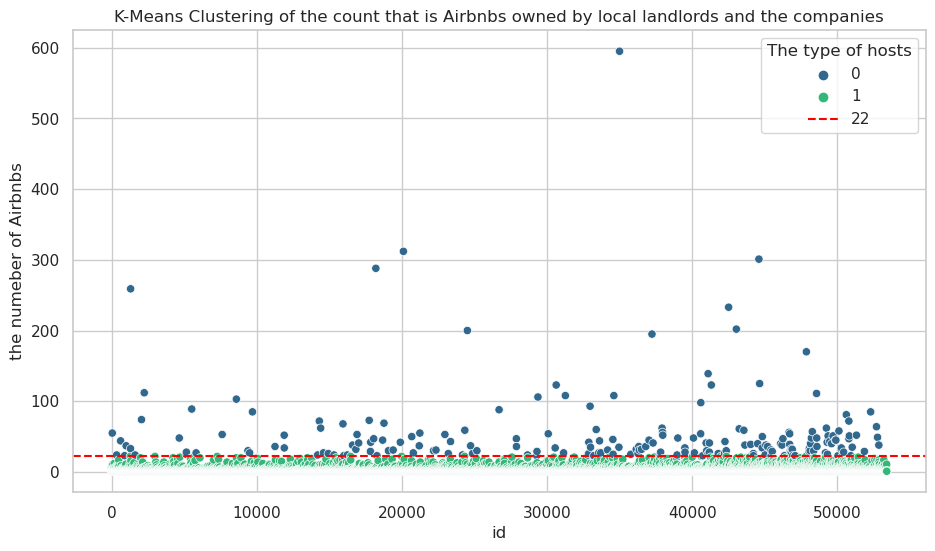

In [11]:
## plot again for checking
# Set the plotting style
sns.set(style="whitegrid")

# Create a scatter plot where the x-axis is the index, the y-axis is the value of 'calculated_host_listings_count', and the color is determined by cluster labels
plt.figure(figsize=(11, 6))
sns.scatterplot(x=grouped_df1.index, y=grouped_df1['counts'], hue=grouped_df1['local_or_company'], palette='viridis')

# Select rows in df that are local landlords, then find the maximum value of the 'calculated_host_listings_count' column from the filtered data. This calculates the maximum number of houses owned by local landlords
# First, select the rows where the value in the 'local_or_company' column is 1, representing local landlords
filtered_rows = grouped_df1[grouped_df1['local_or_company'] == 1]

# Then, find the maximum value in the 'b' column among these rows
max_value_in_local_hosts = filtered_rows['counts'].max()
print(f'Max value in local hosts is: {max_value_in_local_hosts}')

# Add a red dashed line at y=max_value_in_local_hosts, and label it as 'max value of the number of Airbnbs owned by local landlords'
plt.axhline(y=max_value_in_local_hosts, color='red', linestyle='--', label=max_value_in_local_hosts)

# Add chart title and labels
plt.title('K-Means Clustering of the count that is Airbnbs owned by local landlords and the companies')
plt.xlabel('id')
plt.ylabel('the numeber of Airbnbs')

# Display the legend and the chart
plt.legend(title='The type of hosts')
plt.show()

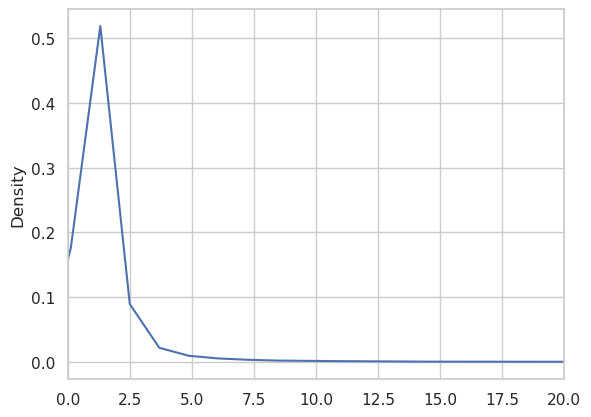

In [12]:
## better know the characteristics of the data and find that maybe Gaussian Mixture Model fit the data
# check data using Kernel Density Estimate (KDE) plot
grouped_df1.counts.plot.kde(xlim=(0,20)); #kernel density estimate plot

In [13]:
# do clustering analysis using Gaussian Mixture Model 
## setting different n_components value sizes to produce different clusters analyses rationality
from sklearn.mixture import GaussianMixture

# grouped_df1 is your DataFrame, containing the column 'counts'
# Convert the 'counts' column into a format suitable for clustering (two-dimensional array).
X = grouped_df1[['counts']].values

# Create a GMM (Gaussian Mixture Model) instance with the number of clusters set to 2
gmm = GaussianMixture(n_components=2, random_state=0)

# Fit and predict the data
grouped_df1['cluster'] = gmm.fit_predict(X)

# View the clustering results
print(grouped_df1.head())

# Check the statistics for each cluster
print(grouped_df1.groupby('cluster')['counts'].describe())

   host_id  counts  local_or_company  cluster
0     4775       6                 1        1
1     4879       1                 1        0
2     6774       7                 1        1
3     9323       1                 1        0
4     9870       1                 1        0
           count      mean        std  min  25%  50%  75%    max
cluster                                                         
0        49018.0  1.114978   0.318999  1.0  1.0  1.0  1.0    2.0
1         4377.0  7.606351  17.077766  3.0  3.0  4.0  7.0  595.0


In [14]:
## maybe 595 is the outlier, so drop it and try different n_components value sizes
# Find the index of the maximum value in the 'cluster' column
max_index = grouped_df1['counts'].idxmax()

# Delete this row
grouped_df1 = grouped_df1.drop(max_index)

In [15]:
## try the GMM to do clustering again
# Convert the 'counts' column into a format suitable for clustering (two-dimensional array)
X = grouped_df1[['counts']].values

# Create a GMM (Gaussian Mixture Model) instance with the number of clusters set to 2
gmm = GaussianMixture(n_components=3, random_state=0)

# Fit the data and make predictions
grouped_df1['local_or_company'] = gmm.fit_predict(X)

# View the clustering results
print(grouped_df1.head())

# Check the statistics for each cluster
print(grouped_df1.groupby('local_or_company')['counts'].describe())

   host_id  counts  local_or_company  cluster
0     4775       6                 1        1
1     4879       1                 0        0
2     6774       7                 1        1
3     9323       1                 0        0
4     9870       1                 0        0
                    count       mean        std  min  25%  50%   75%    max
local_or_company                                                           
0                 43382.0   1.000000   0.000000  1.0  1.0  1.0   1.0    1.0
1                  1388.0  15.887608  23.798912  6.0  7.0  9.0  16.0  312.0
2                  8624.0   2.541512   0.860106  2.0  2.0  2.0   3.0    5.0


In [16]:
## Define based on facts
# Replace values in the 'local_or_company' column that are equal to 0 and 2 with 1, and replace other values with 0
grouped_df1['local_or_company'] = np.where(grouped_df1['local_or_company'] == 0|2, 1, 0)

Max value in local hosts is: 5


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

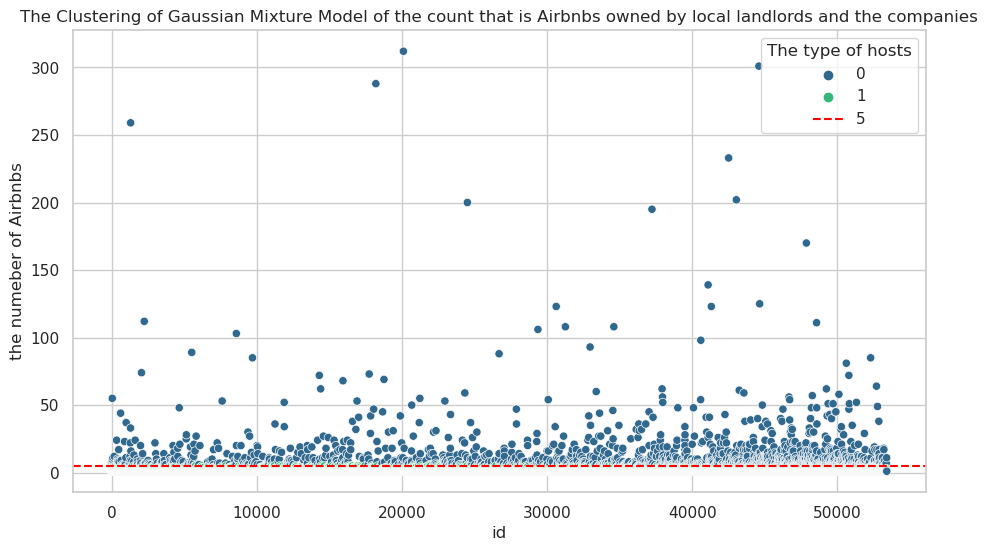

In [17]:
## plot again for visulisation and get the max acount of Airbnbs owned by local landlords
# Set the plotting style
sns.set(style="whitegrid")

# Create a scatter plot where the x-axis is the index, the y-axis is the value of 'calculated_host_listings_count,' and the color is determined by cluster labels
plt.figure(figsize=(11, 6))
sns.scatterplot(x=grouped_df1.index, y=grouped_df1['counts'], hue=grouped_df1['local_or_company'], palette='viridis')

# Select rows in df that are local landlords, then find the maximum value of the 'calculated_host_listings_count' column from the filtered data. This calculates the maximum number of houses owned by local landlords
# First, select the rows where the value in the 'local_or_company' column is 1, representing local landlords
filtered_rows = grouped_df1[grouped_df1['local_or_company'] == 1]

# Then, find the maximum value in the 'b' column among these rows
max_value_in_local_hosts_GMM = filtered_rows['counts'].max()
print(f'Max value in local hosts is: {max_value_in_local_hosts_GMM}')

# Add a red dashed line at y=max_value_in_local_hosts, and label it as 'max value of the number of Airbnbs owned by local landlords
plt.axhline(y=max_value_in_local_hosts_GMM, color='red', linestyle='--', label=max_value_in_local_hosts_GMM)

# Add chart title and labels
plt.title('The Clustering of Gaussian Mixture Model of the count that is Airbnbs owned by local landlords and the companies')
plt.xlabel('id')
plt.ylabel('the numeber of Airbnbs')

# Display the legend and the chart
plt.legend(title='The type of hosts')
plt.show()

In [18]:
# Process the original dataset df by selecting rows where the 'calculated_host_listings_count' column is less than or equal to the max_value_in_local_hosts value and set a new 'local_or_company' column with 1 (1 represents local landlords, 0 represents companies)
df['local_or_company'] = np.where(df['calculated_host_listings_count'] <= max_value_in_local_hosts_GMM, 1, 0)
df.head(14)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,local_or_company
0,13913,Rental unit in Islington · ★4.80 · 1 bedroom ·...,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,79,1,41,2022-12-11,0.26,2,360,11,NaN,1
1,15400,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,150,7,94,2023-05-01,0.56,1,73,5,NaN,1
2,92644,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,498201,Dee Dee,NaN,Wandsworth,51.44201,-0.18739,Private room,42,2,216,2022-10-29,1.45,1,217,9,NaN,1
3,17402,Rental unit in London · ★4.76 · 3 bedrooms · 3...,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,476,3,54,2022-11-19,0.36,9,300,4,NaN,0
4,93015,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,499704,Sarah,NaN,Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,175,5,38,2022-09-30,0.27,1,40,2,NaN,1
5,93734,Condo in London · ★4.62 · 1 bedroom · 1 bed · ...,497514,William,NaN,Greenwich,51.47618,0.01442,Private room,46,4,180,2023-09-02,1.21,1,196,25,NaN,1
6,24328,Townhouse in London · ★4.90 · 1 bedroom · 1 be...,41759,Joe,NaN,Wandsworth,51.47072,-0.16266,Entire home/apt,250,2,96,2022-07-19,0.62,1,0,0,NaN,1
7,93783,Rental unit in London · ★4.73 · 2 bedrooms · 3...,502496,Darshi Rowan And Tara,NaN,Westminster,51.51881,-0.19650,Entire home/apt,371,5,24,2023-05-29,0.16,1,266,3,NaN,1
8,25123,Home in Barnet · ★4.78 · 1 bedroom · 1 bed · 1...,103583,Grace,NaN,Barnet,51.57438,-0.21081,Private room,29,10,129,2020-03-15,0.79,3,0,0,NaN,1
9,94138,Rental unit in Poplar · ★4.85 · 1 bedroom · 1 ...,503548,Carl,NaN,Tower Hamlets,51.52764,-0.05293,Entire home/apt,75,2,42,2020-03-05,0.64,1,0,0,NaN,1


#### 
estimated_annual_income 房东收入

In [19]:
# Assuming DataFrame is named 'df'
# Replace 'df' with the actual name of your DataFrame variable

import re

# Setting the model parameters
review_rate = 0.5
average_days = 3

# Selecting listings where availability_365 is greater than 0
df_geq_0 = df[df.availability_365 > 0]

# Calculating estimated annual nights
df.loc[df.availability_365 > 0, 'estimated_annual_nights'] = (
    (df_geq_0.reviews_per_month / review_rate * average_days * 12) / 365
) * df_geq_0.availability_365

# Setting estimated annual income to 0 for listings with availability_365 equals 0
df.loc[df.availability_365 == 0, 'estimated_annual_income'] = 0

# Calculating estimated annual income
df.loc[df.availability_365 > 0, 'estimated_annual_income'] = df['estimated_annual_nights'] * df_geq_0.price

# Filling any missing values in both new columns with 0
df[['estimated_annual_nights', 'estimated_annual_income']] = df[['estimated_annual_nights', 'estimated_annual_income']].fillna(0)

# Extract the number of beds from the 'name' column.
def extract_beds(name):
    match = re.search(r'(\d+)\s+beds?', name)
    return int(match.group(1)) if match else 0

df['number_of_beds'] = df['name'].apply(extract_beds)

tourists_expenditure 游客消费

In [20]:
# Calculate 'tourists_expenditure' 
df['tourists_expenditure'] = df['number_of_beds'] * df['estimated_annual_nights'] * 100

In [21]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,local_or_company,estimated_annual_nights,estimated_annual_income,number_of_beds,tourists_expenditure
0,13913,Rental unit in Islington · ★4.80 · 1 bedroom ·...,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,79,...,0.26,2,360,11,NaN,1,18.463562,1458.621370,1,1846.356164
1,15400,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,150,...,0.56,1,73,5,NaN,1,8.064000,1209.600000,1,806.400000
2,92644,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,498201,Dee Dee,NaN,Wandsworth,51.44201,-0.18739,Private room,42,...,1.45,1,217,9,NaN,1,62.067945,2606.853699,1,6206.794521
3,17402,Rental unit in London · ★4.76 · 3 bedrooms · 3...,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,476,...,0.36,9,300,4,NaN,0,21.304110,10140.756164,3,6391.232877
4,93015,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,499704,Sarah,NaN,Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,175,...,0.27,1,40,2,NaN,1,2.130411,372.821918,2,426.082192


#### local economic multiplier -- LM3 
本地经济乘数

得出当地 旅游 economy contribution by airbnb tourism 

In [22]:
# applying local economic multiplier
coef1 = 1.76
coef2 = 0.36

In [23]:
# local landlords using 1.76, real estate company landlord using 0.36
df.loc[df.local_or_company==1,'value_to_local_economy']=df.loc[df.local_or_company==1,'estimated_annual_income']*coef1
df.loc[df.local_or_company==0,'value_to_local_economy']=df.loc[df.local_or_company==0,'estimated_annual_income']*coef2

# Update 'value_to_local_economy' by adding the product of 'tourists_expenditure' and coef1(1.76)
df['value_to_local_economy'] += df['tourists_expenditure'] * coef1

In [24]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,local_or_company,estimated_annual_nights,estimated_annual_income,number_of_beds,tourists_expenditure,value_to_local_economy
0,13913,Rental unit in Islington · ★4.80 · 1 bedroom ·...,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,79,...,2,360,11,NaN,1,18.463562,1458.621370,1,1846.356164,5816.760460
1,15400,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,150,...,1,73,5,NaN,1,8.064000,1209.600000,1,806.400000,3548.160000
2,92644,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,498201,Dee Dee,NaN,Wandsworth,51.44201,-0.18739,Private room,42,...,1,217,9,NaN,1,62.067945,2606.853699,1,6206.794521,15512.020866


In [25]:
df = df.groupby('neighbourhood')['value_to_local_economy'].sum().reset_index(name='local_economy_contribution_from_airbnb')

df['local_economy_contribution_from_airbnb'] = df['local_economy_contribution_from_airbnb'].round(2)

# Generate a new CSV file to display the local economy contribution from Airbnb tourism for each borough.
df.to_csv('local_economy_contribution_from_airbnb_tourism.csv', index=False)

In [26]:
df.head()

,neighbourhood,local_economy_contribution_from_airbnb
0,Barking and Dagenham,6589655.35
1,Barnet,20126415.24
2,Bexley,5979833.30
3,Brent,24082814.46
4,Bromley,8261503.75
